## Data Science Assignment
Importing all relevant libraries for Data Preparation (importing and cleaning), EDA, ML Model Implementation and Results Evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
sns.set()

<p>The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y). More details can be found <a href="https://archive.ics.uci.edu/ml/datasets/bank+marketing">here</a>.</p>
Firstly, we read the dataset into a dataframe using pandas.


In [185]:
df = pd.read_csv("bank-additional-full.csv", delimiter=";")
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [165]:
df['cons.price.idx'].unique()

array([93.994, 94.465, 93.918, 93.444, 93.798, 93.2  , 92.756, 92.843,
       93.075, 92.893, 92.963, 92.469, 92.201, 92.379, 92.431, 92.649,
       92.713, 93.369, 93.749, 93.876, 94.055, 94.215, 94.027, 94.199,
       94.601, 94.767])

Following histograms from few attributes shows that our data is left skewed.

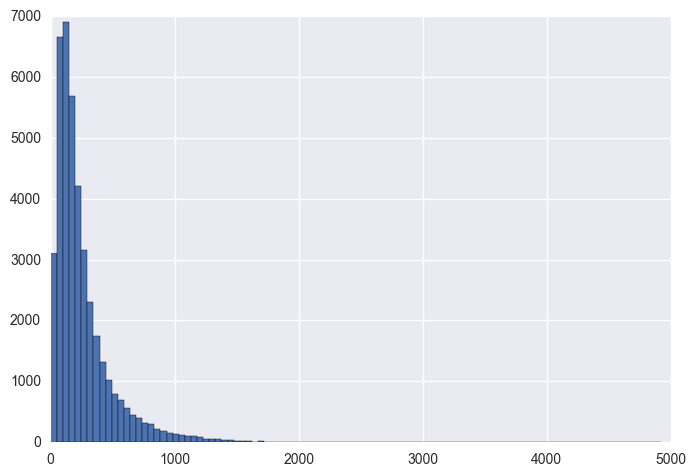

In [166]:
plt.hist((df.duration),bins=100)
plt.show()

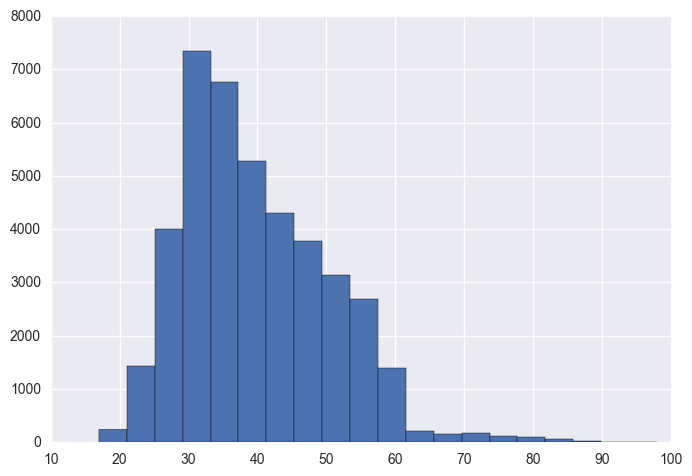

In [167]:
plt.hist(df.age,bins=20)
plt.show()

Our dataset is imbalanced (no=4640, yes=36548) which means data sampling and evaluation must be done carefully.

In [168]:
print df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64


A concise summary of the dataframe is given below. It shows that there a total of 21 non-null columns. 

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

You can see that 10 columns are numerical and 11 are categorical. Let us just convert few of them to numeric.

In [170]:
for i in ['default', 'housing', 'loan', 'y']:
    df[i] = df[i].map({'no': 0, 'yes': 1})
    
df = df.dropna()
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0.0,1.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0.0,0.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0.0,0.0,1.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
6,59,admin.,married,professional.course,0.0,0.0,0.0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


We are going to use the simplest classification algorithm i.e. K-Nearest Neighbours. 

In [171]:
#reading all numeric features into X as numpy array
X = np.asarray(df[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
                  'cons.conf.idx', 'euribor3m', 'nr.employed', 'default', 'housing', 'loan']].dropna())

#scaling features to avoid dominance of attributes with higher magnitude
X_scaled = scale(X)

#reading target feature in Y
Y = df['y'].values

Before proceeding for actually implementing KNN, we just check which features are more important.

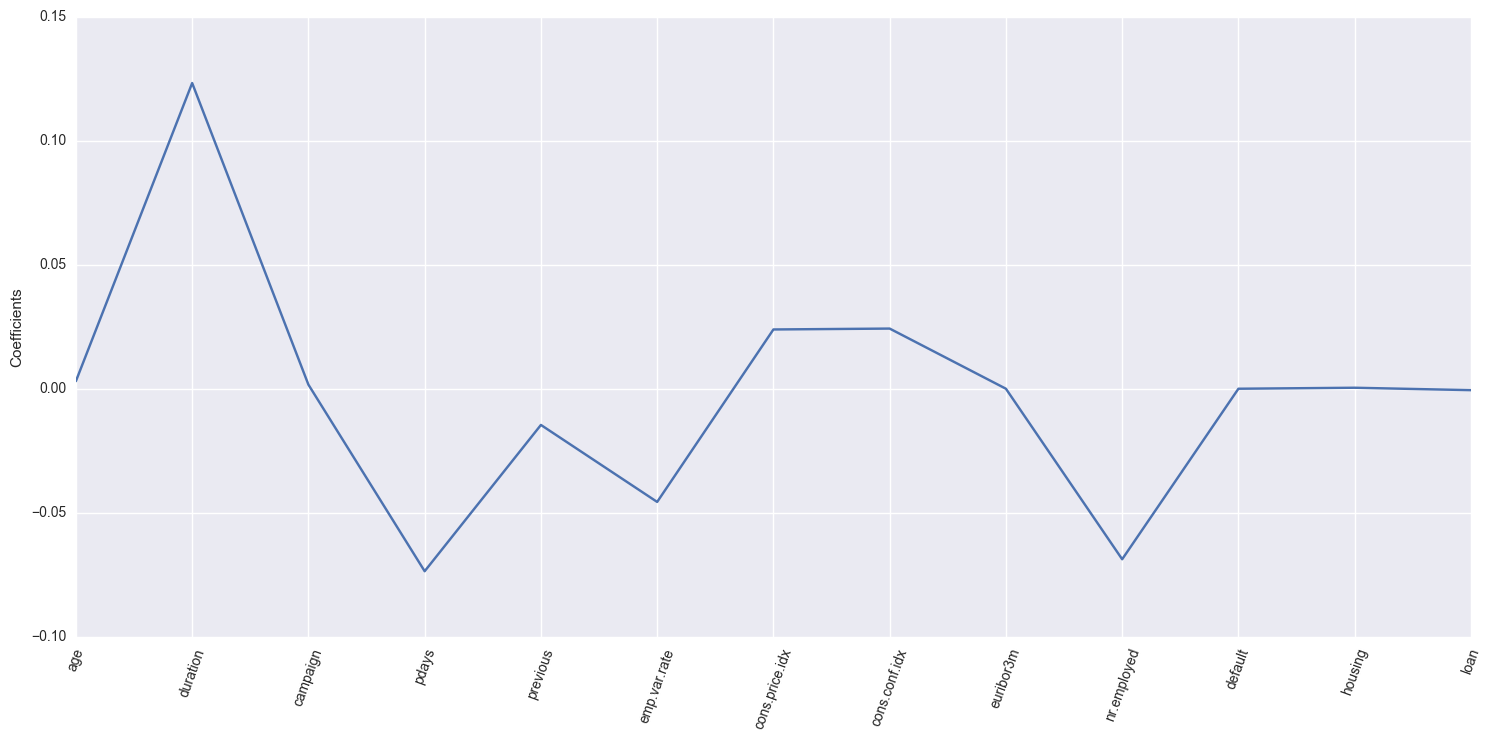

In [172]:
# using lasso for feature selection
names = df[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
            'cons.conf.idx', 'euribor3m', 'nr.employed', 'default', 'housing', 'loan']].columns

lasso = Lasso(alpha=0.001)
lasso_coef = lasso.fit(X_scaled, Y).coef_

plt.figure(figsize=(18,8))
_ = plt.plot(range(len(names)), lasso_coef) 
_ = plt.xticks(range(len(names)), names, rotation=70) 
_ = plt.ylabel('Coefficients') 
plt.show()

As Lasso zero down all unimportant features, we can see from above graph that 'duration' is the most significant feature here. Yet, the 'duration' is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. 'cons.price.idx' and 'cons.conf.idx' are also relevant. Let us just fit our model on these 2 features. We are using grid search for finding best value of K.

In [173]:
X_new = np.asarray(df[['cons.price.idx', 'cons.conf.idx']].dropna())
X_new = scale(X_new)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_new, Y, test_size=0.2)
p_grid = {'n_neighbors':np.arange(1,50,2)}
knn = KNeighborsClassifier(n_jobs=-1)
knn_cv = GridSearchCV(knn, p_grid, cv=10)
knn_cv.fit(Xtrain, Ytrain)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [174]:
#printing best value of K and Accuracy over 20% test set
y_pred = knn_cv.predict(Xtest)
bestK = knn_cv.best_params_.values()[0]
print "Best Value of k: ", knn_cv.best_params_
print "Accuracy with best feature: ", accuracy_score(y_pred, Ytest)

Best Value of k:  {'n_neighbors': 41}
Accuracy with best feature:  0.8711907005969212


Awesome! Accuracy of our model is 87%. But wait, our dataset was imbalanced. So accuracy is not the right evaluation metric and it is better to evaluate on the basis of precision, recall and f1-score.

In [175]:
print classification_report(Ytest, y_pred)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      5532
           1       0.56      0.08      0.13       834

   micro avg       0.87      0.87      0.87      6366
   macro avg       0.72      0.53      0.53      6366
weighted avg       0.84      0.87      0.83      6366



f1-score is 83%. Not bad at all, considering we have only tuned a single parameter. Now lets just use all our features in KNN and see whether f1-score increases or decreases.

In [176]:
X_scaled = scale(np.asarray(df[['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
                  'cons.conf.idx', 'euribor3m', 'nr.employed', 'default', 'housing', 'loan']].dropna()))

# Now split data using all features and repeat above process
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_scaled, Y, test_size=0.2)

# finding best value for k using GridSearchCV
p_grid = {'n_neighbors':np.arange(1,50,2)}
knn = KNeighborsClassifier(n_jobs=-1)
knn_cv_full = GridSearchCV(knn, p_grid, cv=10)

# applying fit/predict functions
knn_cv_full.fit(Xtrain, Ytrain)
y_pred = knn_cv_full.predict(Xtest)

# evaluating predictions using different metrics
print "Best Value of k: ", knn_cv_full.best_params_
print "Accuracy: ", accuracy_score(y_pred, Ytest)
print "Classification Report (Precision, Recall, F1-Score)"
print classification_report(Ytest, y_pred)

Best Value of k:  {'n_neighbors': 45}
Accuracy:  0.8843857995601634
Classification Report (Precision, Recall, F1-Score)
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      5548
           1       0.65      0.22      0.33       818

   micro avg       0.88      0.88      0.88      6366
   macro avg       0.77      0.60      0.63      6366
weighted avg       0.86      0.88      0.86      6366



<p>By using all features, f1-score increases only by 3%. It shows the importance of feature selection.</p>
But look at precision and recall of class 1, it is very low. As we have seen that our dataset was imbalanced, now we will try over sampling on best selected features and see how it effects our results.

In [177]:
from imblearn.over_sampling import SMOTE

In [178]:
sos = SMOTE()
X_resampled, y_resampled = sos.fit_sample(X_new, Y)

In [179]:
# Now split data using all features and repeat above process
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_resampled, y_resampled, test_size=0.2)

# finding best value for k using GridSearchCV
p_grid = {'n_neighbors':np.arange(1,50,2)}
knn = KNeighborsClassifier(n_jobs=-1)
knn_cv_balanced = GridSearchCV(knn, p_grid, cv=10)

# applying fit/predict functions
knn_cv_balanced.fit(Xtrain, Ytrain)
y_pred = knn_cv_balanced.predict(Xtest)

# evaluating predictions using different metrics
print "Best Value of k: ", knn_cv_balanced.best_params_
print "Accuracy: ", accuracy_score(y_pred, Ytest)
print "Classification Report (Precision, Recall, F1-Score)"
print classification_report(Ytest, y_pred)

Best Value of k:  {'n_neighbors': 37}
Accuracy:  0.7415922820304751
Classification Report (Precision, Recall, F1-Score)
              precision    recall  f1-score   support

           0       0.70      0.83      0.76      5521
           1       0.80      0.65      0.72      5570

   micro avg       0.74      0.74      0.74     11091
   macro avg       0.75      0.74      0.74     11091
weighted avg       0.75      0.74      0.74     11091



<b>Both f1-score and accuracy decreased significantly but still these seems to be more balanced results. There is noteworthy improvement in precision and recall of class 1.</b>

<p>Before we wrap up, lets try to answer a business question from this dataset.</p>
<b>Is marital status related to success of bank marketing campaign?</b>

In [180]:
yes_list = []
no_list = []

for d in df['marital'].unique():
    no_list.append(dict(df[df['marital']==d]['y'].value_counts())[0])
    yes_list.append(dict(df[df['marital']==d]['y'].value_counts())[1])
    
print yes_list
print no_list

success_ratio = []

for i in range(len(yes_list)):
    success_ratio.append((yes_list[i] * 100)/(yes_list[i]+no_list[i]))
    
print success_ratio
success_ratio.pop()
print success_ratio

[2169, 1496, 424, 12]
[16064, 8352, 3255, 56]
[11, 15, 11, 17]
[11, 15, 11]


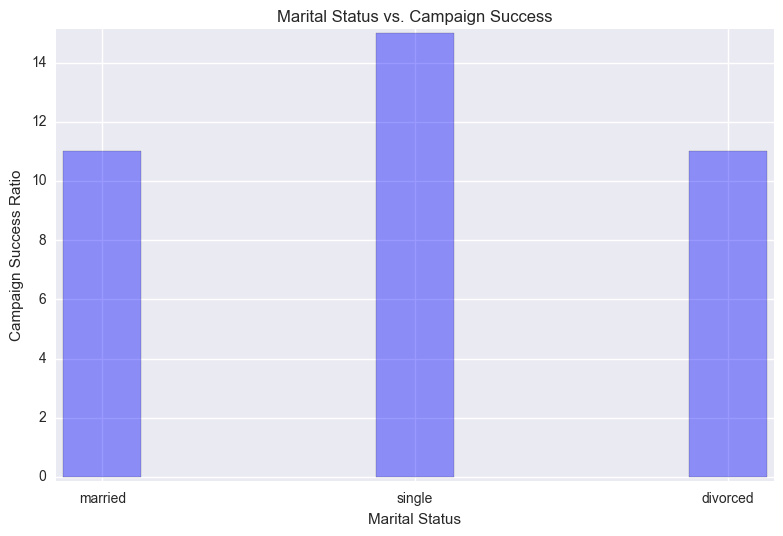

In [181]:
name_list = list(df['marital'].unique())
name_list.pop()
n_groups = len(name_list)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, success_ratio, bar_width,
                 alpha=opacity,
                 color='b',
                 error_kw=error_config,
                 label='Success')

plt.margins(0.01)

plt.xlabel('Marital Status')
plt.ylabel('Campaign Success Ratio')
plt.title('Marital Status vs. Campaign Success')
plt.xticks(index + bar_width / 2, name_list)

plt.tight_layout()
plt.show()

This histogram shows that bank marketing campaign results in convincing more single people to subscribe (bank term deposit) as compared to married and divorced people.

Finally, we will save our all trained models using joblib. It would be easier to load the trained model in our Flask based web app.

In [183]:
from sklearn.externals import joblib

In [184]:
joblib.dump(knn_cv, 'ModelTwoFeatures.joblib') 
joblib.dump(knn_cv_full, 'ModelFullFeatures.joblib') 
joblib.dump(knn_cv_balanced, 'ModelBalancedClasses.joblib') 

['ModelBalancedClasses.joblib']